In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

import matplotlib.pyplot as plt

import inference.scheduler
from inference.distribution import Gaussian, GaussianMixture, CheckerboardSampleable
from inference.sde import EulerMaruyamaSimulator, LangevinDynamics
import utils.vis2d.visualization

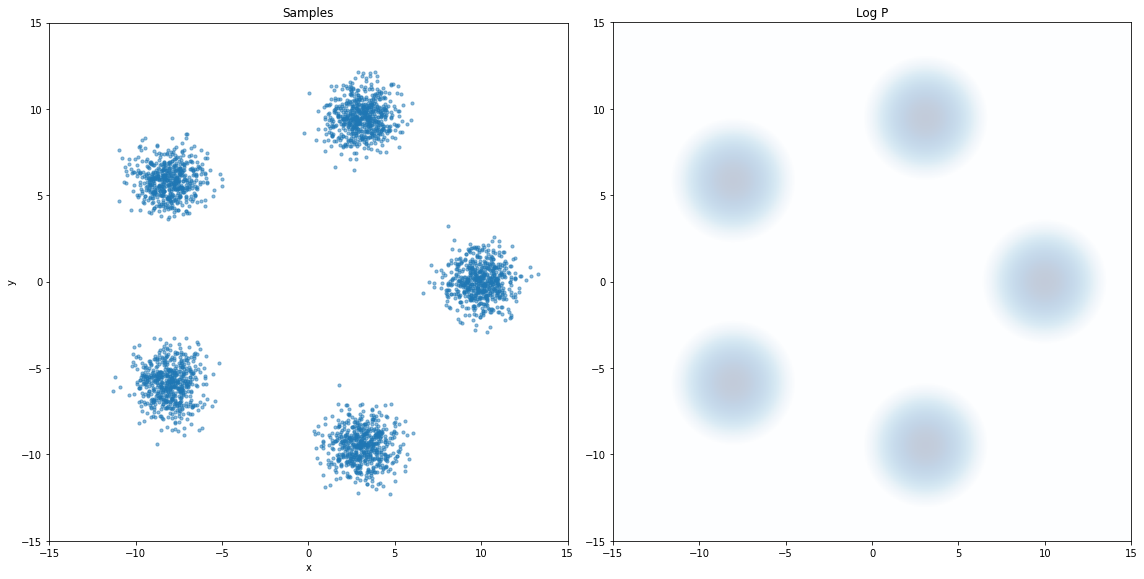

In [69]:
### Distribution
PARAMS = {
    "scale": 15.0,
    "target_scale": 10.0,
    "target_std": 1.0,
}
dist = GaussianMixture.symmetric_2D(nmodes=5, std=PARAMS["target_std"], scale=PARAMS["target_scale"]).to(device)

num_samples = 3000
samples = dist.sample(num_samples=num_samples)

### Visualization
scale = PARAMS["scale"]
x_bounds = [-scale,scale]
y_bounds = [-scale,scale]

fig, axes = plt.subplots(1,2, figsize=(16,8))

# Left plot
axes[0].set_title('Samples')
utils.vis2d.visualization.visualize_samples(samples, x_bounds=x_bounds, y_bounds=y_bounds, ax=axes[0])

# Right plot
axes[1].set_title('Log P')
im = utils.vis2d.visualization.visualize_density(density=dist, 
                                                 x_bounds=x_bounds, 
                                                 y_bounds=y_bounds, 
                                                 bins=200, 
                                                 device=device,
                                                 ax=axes[1], vmin=-10, alpha=0.25, cmap=plt.get_cmap('Blues'))
fig.tight_layout()
plt.show()